In [174]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
%matplotlib inline

# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv',low_memory=False,header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

# split the data and labels in training and testing sements
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [ ]:
# 3-fold cross validated hyperparameter fine tuning with gridsearchcv

# # Hyperparameter optimization for LinearSVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# max_iter_range = [100, 500, 1000]
# parameters = {"C":C_range, "max_iter":max_iter_range}
# clf = GridSearchCV(lsvc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for SVC using Grid Search Cross-Validation
# C_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# parameters = {"C":C_range}
# clf = GridSearchCV(svc, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for KNN using Grid Search Cross-Validation
# parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'leaf_size': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(knn, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Decision Tree using Grid Search Cross-Validation
# parameters = [{'max_features': ['auto', 'log2'], 'max_depth': [10,20,30,40,50,60,70,80,90,100]}]
# clf = GridSearchCV(dt, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

# # Hyperparameter optimization for Random Forest using Grid Search Cross-Validation
# parameters = [{"n_estimators": [5, 10, 20, 50]}]
# clf = GridSearchCV(rf, parameters)
# clf.fit(data_final, labels)
# print("The best classifier is: ", clf.best_estimator_)

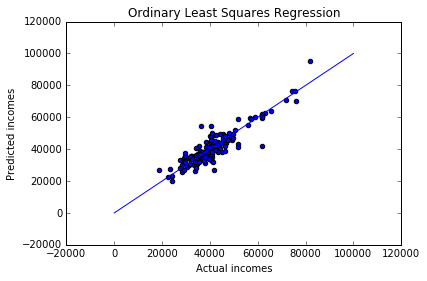

RMSE: 4668.07435112
r2: 0.812665561896


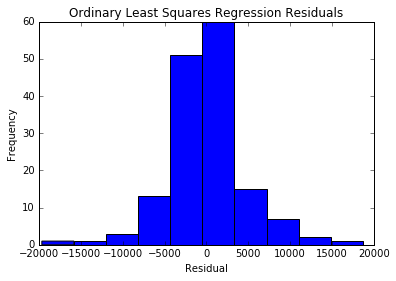

                                                         1
University of Phoenix-Online Campus          -19654.410999
Alaska Pacific University                    -14790.091811
Argosy University-Orange County              -10028.328554
University of Alabama in Huntsville           -9106.495799
Argosy University-Washington DC               -8241.698379
Covenant College                              -8005.544215
Alderson Broaddus University                  -7469.919969
Stevenson University                          -7429.381287
Aquinas College                               -7343.856607
American InterContinental University-Atlanta  -7056.688104
                                                               1
The Art Institute of California-Argosy Universi...  18690.700005
University of Hawaii at Manoa                       13670.486324
Southern College of Optometry                       13253.914848
Goldey-Beacom College                                9235.261916
National University Colleg

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


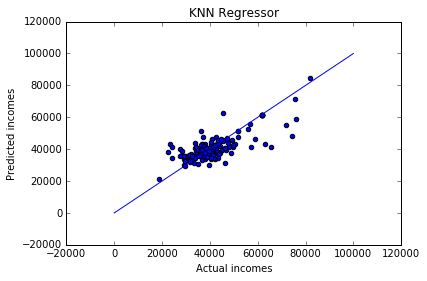

RMSE: 6809.60971096
r2: 0.60135480368


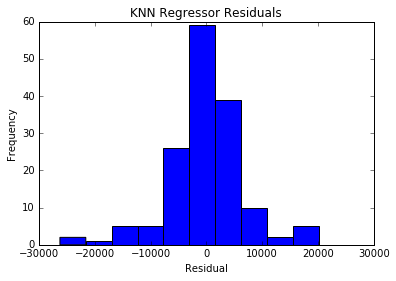

                                                       1
Southwestern Law School                           -26240
Rush University                                   -24100
Kettering University                              -19980
University of Pennsylvania                        -16620
Charles R Drew University of Medicine and Science -16280
Illinois Institute of Technology                  -15560
D'Youville College                                -14940
Worcester Polytechnic Institute                   -12520
SUNY at Binghamton                                -11340
High Point University                              -9500
                                              1
Marlboro College-Graduate School          20120
Warren Wilson College                     17220
Middlebury College                        17080
Gallaudet University                      16000
Argosy University-Los Angeles             15500
Stephens College                          12600
University of California-Santa Cruz  

In [196]:
def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_predict-y_test)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())[1]

def listTenLargestResiduals(y_predict, y_test):
    residuals = (y_predict-y_test)
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)
        
regress(linear_model.LinearRegression(), 'Ordinary Least Squares Regression')
regress(KNeighborsRegressor(), "KNN Regressor")

In [197]:
# these forms of regression have errors
# regress(linear_model.Ridge(), 'Ridge Regression')
# regress(linear_model.Lasso(), 'Lasso Regression')
# regress(linear_model.ElasticNet(), 'Elastic Net Regression')
# regress(DecisionTreeRegressor(max_depth=10), 'Decision Tree Regression')
# regress(RandomForestRegressor(n_estimators = 100, max_depth = 5, warm_start = False), 'Random Forest Regression')

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 216


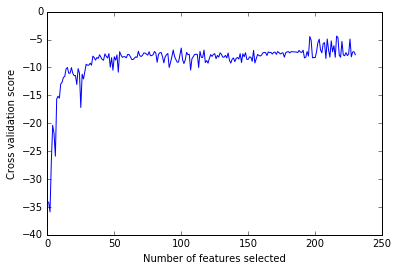

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  8,  1,
        2,  1,  1,  3,  1,  1,  9,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 14,  1, 12,  1,  1,  1,  1,  1,  6,  5, 13,  7,
        1, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [220]:
# feature selection
# http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#example-feature-selection-plot-rfe-with-cross-validation-py

from sklearn.feature_selection import RFECV

reg = linear_model.LinearRegression().fit(x, y)
rfecv = RFECV(estimator=reg, cv=KFold(n=4, n_folds=2))
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

rfecv.ranking_

In [271]:
# list the most predictive features (aka feature importance)
# still need to do...


In [227]:
from sklearn.feature_selection import SelectFromModel
print(x.shape)
reg = linear_model.LinearRegression().fit(x, y)
x_new = SelectFromModel(reg, prefit=True).transform(x)
print(x_new.shape)

(1534, 230)
(1534, 21)


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


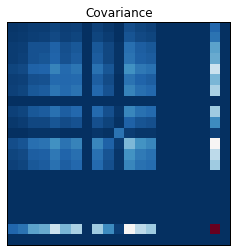

In [241]:
# plotting covariance matrix after feature selection
# http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
x_new = SelectKBest(f_regression, k=21).fit_transform(x, y)
emp_cov = np.dot(x_new.T, x_new) / len(x_new)
vmax = emp_cov.max()
plt.imshow(emp_cov, interpolation='nearest', vmin=0, vmax=vmax,
           cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.title('Covariance')
plt.show()

In [218]:
# feature importance listings

In [219]:
# PCA, plotted with school name

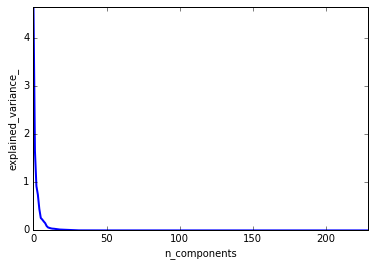

In [246]:
# PCA, number of features vs feature importance
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#example-plot-digits-pipe-py
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

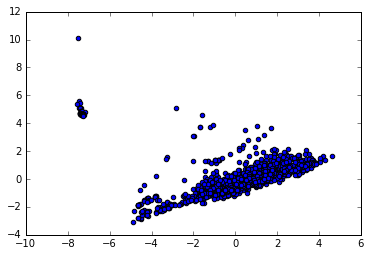

In [261]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca_reduced = pca.fit_transform(x)

plt.figure()
plt.scatter(x_pca_reduced[:,0], x_pca_reduced[:,1])
plt.show()

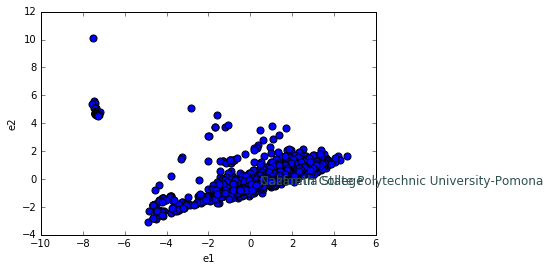

In [270]:
import random
x_pca_reduced_pd = pd.DataFrame(data=x_pca_reduced, index=list_schools, columns=['e1', 'e2'])  # 1st row as the column names

ax = x_pca_reduced_pd.plot('e1','e2', kind='scatter', s=50)

def annotate_df(row):  # get the annotations of the schools to work
    if random.random() < .0005: # probabilistically plot some of names of the points
        ax.annotate(row.name, row.values,
                xytext=(10,-5), 
                textcoords='offset points',
                size=12, 
                color='darkslategrey')

ab= x_pca_reduced_pd.apply(annotate_df, axis=1)

plt.show()

In [ ]:
# cluster in the pca with k-mean and gaussian mixture models. looks like 2 clusters is sufficient

# add the violin plots of each cluster across different features to come to conclusions...
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html